<a href="https://www.kaggle.com/code/omeraydogddu/diabetes-dataset-feature-engineering-eda?scriptVersionId=169328084" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Feature Engineering for Diabetes DataSet and Modelling ,EDA**

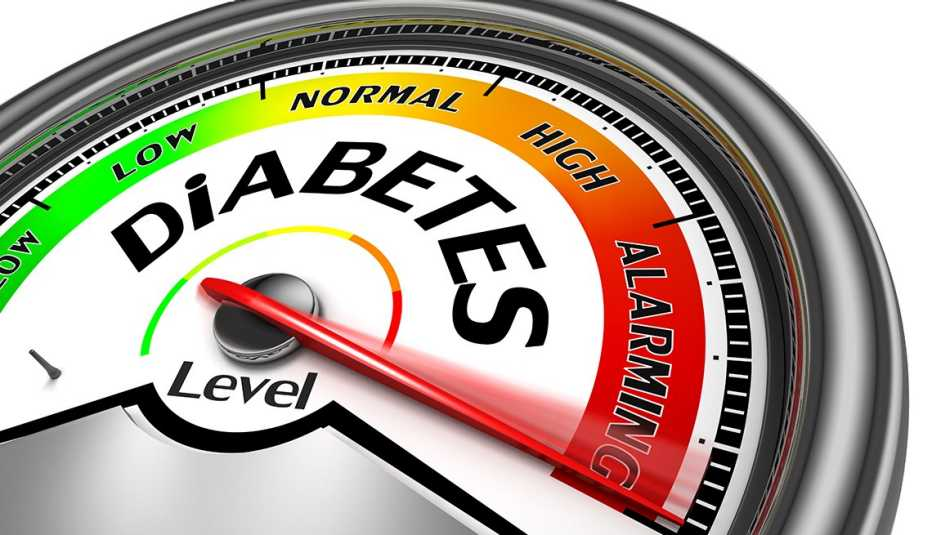

The target variable is specified as "outcome"; 1 indicates positive diabetes test result, 0 indicates negative.

Variables:¶
>* **Pregnancies** - Number of pregnancies
>* **Glucose** - 2-hour plasma glucose concentration in the oral glucose tolerance test
>* **BloodPressure** - Diastolic Blood Pressure
>* **SkinThickness** - Thickness of Skin
>* **Insulin**- 2-hour serum insulin
>* **DiabetesPedigreeFunction** - 
>* **BMI** - Body Mass Index****
>* **Age** - Age
>* **Outcome** - Diabetic ( 1 or 0 )

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


> **LIBRARY**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

 > **DATASET**

In [3]:
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

In [4]:
def check_data(dataframe,head=5):
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
--------------------     Data Shape     --------------------
(768, 9)

--------------------  The First 5 Data  --------------------
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  O

In [5]:
#WE FOUND VARIABLES WITH CATEGORICAL NUMERIC AND CARDINAL DATA TYPES
def grab_col_names(dataframe, cat_th=5, car_th=10):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]  
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and    
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and  
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat          
    cat_cols = [col for col in cat_cols if col not in cat_but_car]   

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]  
    num_cols = [col for col in num_cols if col not in num_but_cat]                  

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [6]:

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [7]:
#TARGET VARIABLE ANALYSIS
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n")
    print("###################################")

In [8]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
for col in num_cols:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0              3.298
1              4.866

###################################
         Glucose
Outcome         
0        109.980
1        141.257

###################################
         BloodPressure
Outcome               
0               68.184
1               70.825

###################################
         SkinThickness
Outcome               
0               19.664
1               22.164

###################################
         Insulin
Outcome         
0         68.792
1        100.336

###################################
           BMI
Outcome       
0       30.304
1       35.143

###################################
         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550

###################################
           Age
Outcome       
0       31.190
1       37.067

###################################


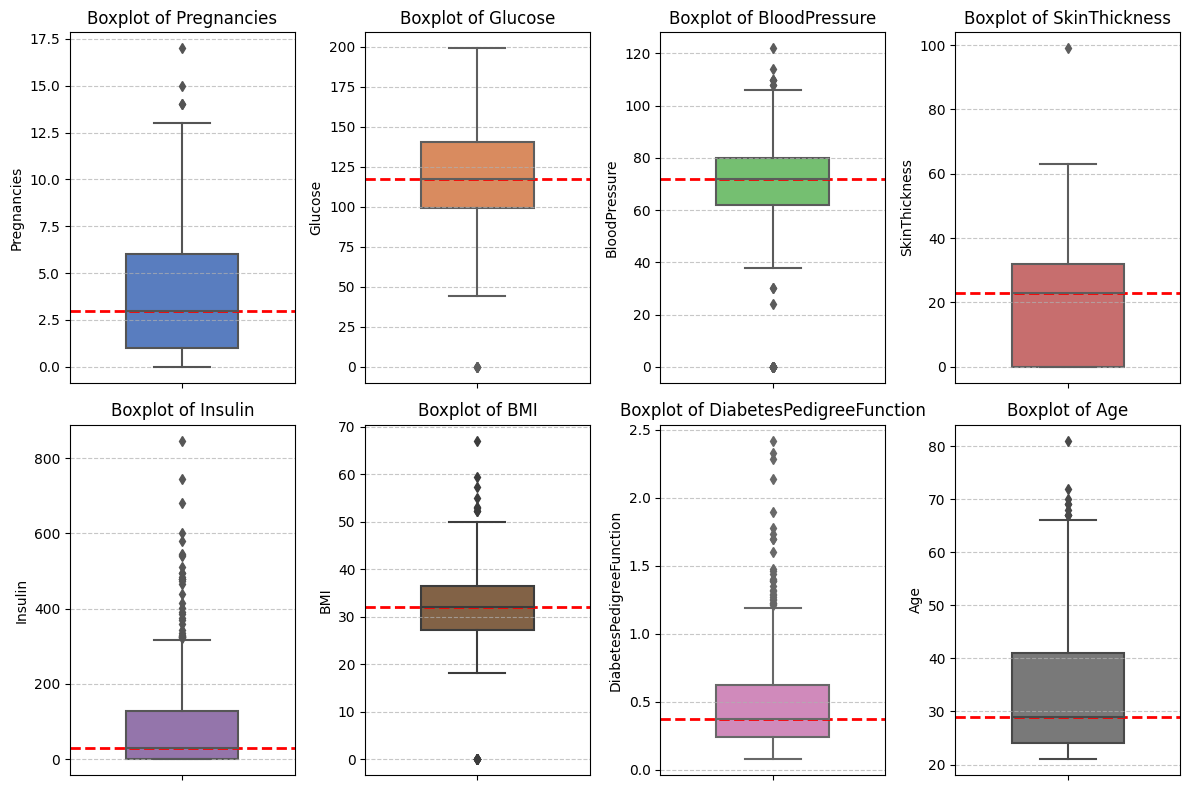

In [10]:
# VARIABLE-BASED OUTLIERS
palette = sns.color_palette('muted')

plt.figure(figsize=(12, 8))
for i, column in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[column], color=palette[i-1], width=0.5)
    plt.axhline(y=df[column].median(), color='red', linestyle='--', linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show() 

In [11]:
#TO TURN OFF A WARNING DUE TO VERSIONING
import warnings
warnings.filterwarnings("ignore")

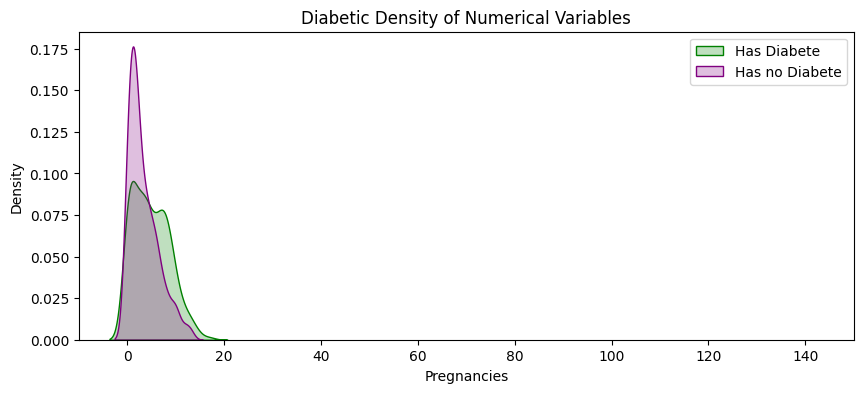

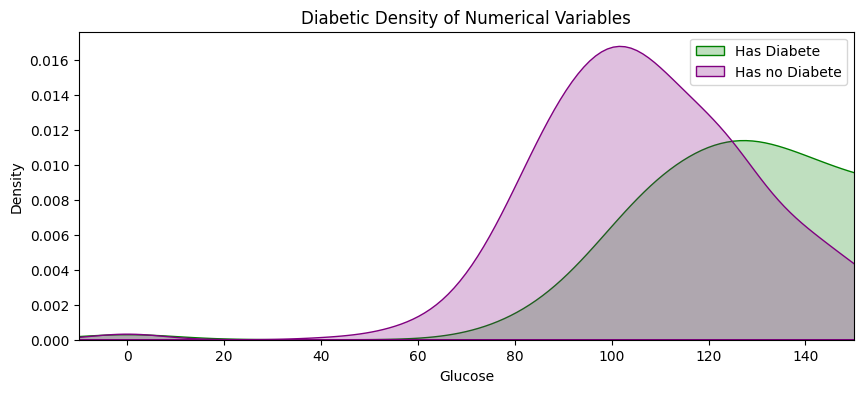

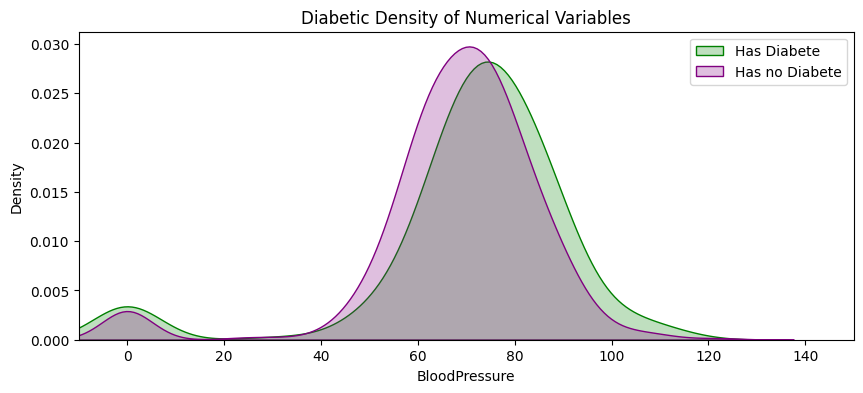

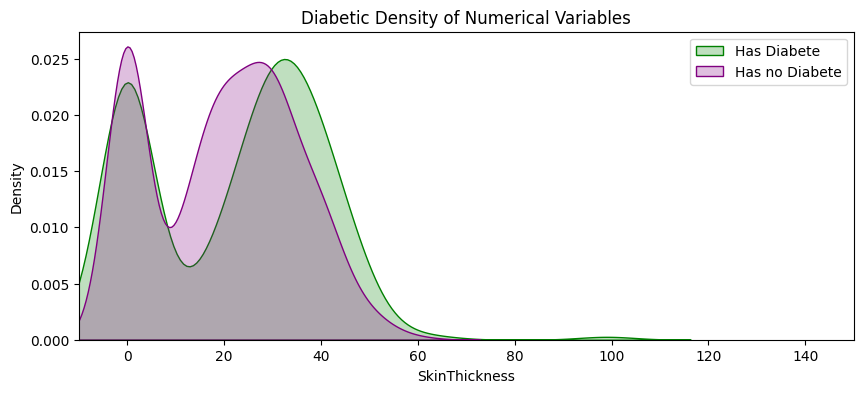

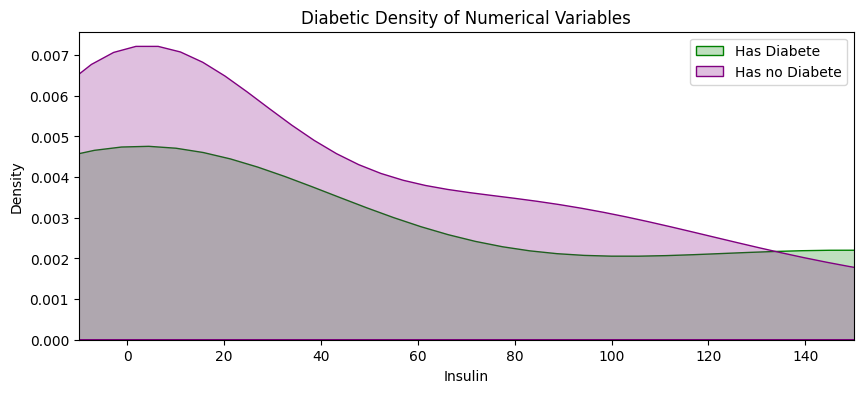

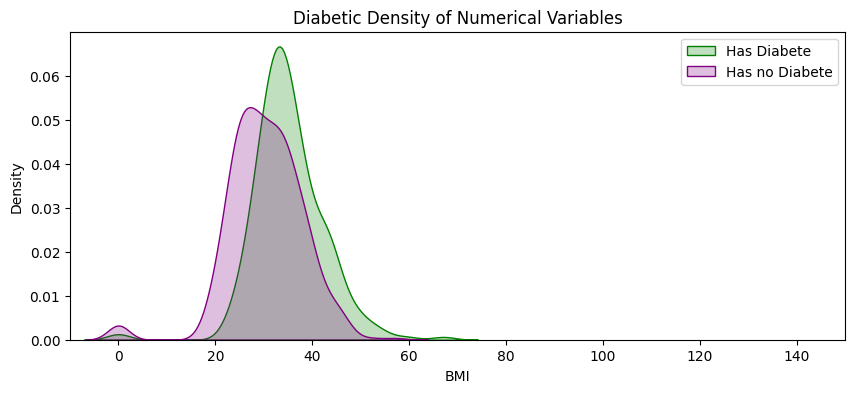

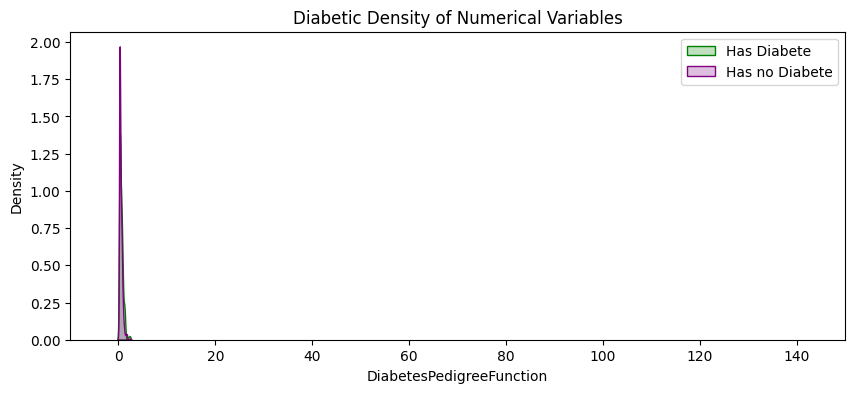

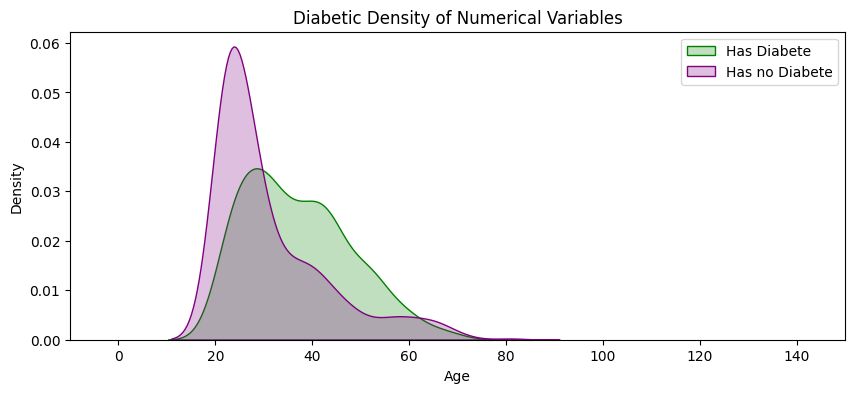

In [12]:
# TARGET VARIABLE ESTIMATION DENSITY BASED ON NUMERICAL VARIABLES
def target_density_est_with_num(dataframe, target, numerical_col):
    plt.figure(figsize=(10,4))
    with sns.plotting_context(rc={"mode.use_inf_as_na": True}):
        dataframe[numerical_col].replace([np.inf, -np.inf], np.nan)
        ax = sns.kdeplot(dataframe[numerical_col][dataframe[target] == 1], color="green", fill=True)
        sns.kdeplot(dataframe[numerical_col][dataframe[target] == 0], color="purple", fill=True)
    plt.legend(['Has Diabete', 'Has no Diabete'])
    plt.xlim(-10, 150)
    plt.title("Diabetic Density of Numerical Variables")
    plt.show()
    
for col in num_cols:
    target_density_est_with_num(df, "Outcome", col)

In [13]:
#CORRELATIONS OF VARIABLES WITH EACH OTHER
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


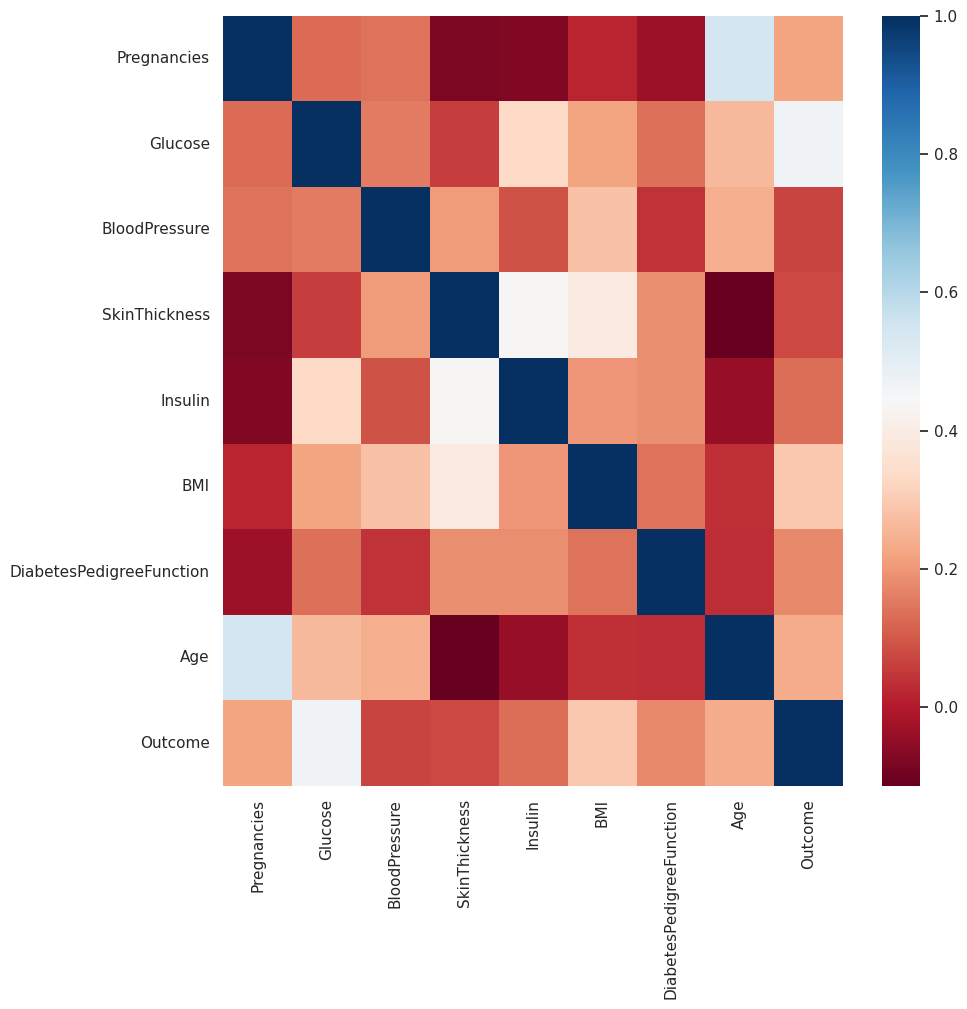

In [14]:
# HEATMAP OF THE RELATIONSHIP
sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(corr_matrix, cmap="RdBu")
plt.show()

> **BASE MODEL**

SCORE BEFORE STARTING FEATURE TRAINING

In [15]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [16]:
rf_model_1 = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model_1.predict(X_test)
accuracy_score(y_pred, y_test)

0.7662337662337663

**FEATURE ENGINEERING**

In [17]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000


In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [19]:
# WE CATCH VARIABLES WITH ZEROS IN THEM
def zero_frequency_control(dataframe, numerical_cols):
    for col in numerical_cols:
        zero_frequency = any(dataframe[col] == 0)
        print(col + " => " + str(zero_frequency))

zero_frequency_control(df,num_cols)

Pregnancies => True
Glucose => True
BloodPressure => True
SkinThickness => True
Insulin => True
BMI => True
DiabetesPedigreeFunction => False
Age => False


In [20]:
new_list =df.loc[:,["Pregnancies", "DiabetesPedigreeFunction","Age"]]
num_cols = [col for col in num_cols if col not in new_list]

In [21]:
# WE FILL THESE LINES WITH NaN
def replace_zeros_with_nan(dataframe, numerical_cols):
    for col in numerical_cols:
        dataframe[col] = dataframe[col].replace(0, np.nan)

replace_zeros_with_nan(df,num_cols)

In [22]:
zero_frequency_control(df,num_cols)

Glucose => False
BloodPressure => False
SkinThickness => False
Insulin => False
BMI => False


In [23]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [24]:
def show_missing_values(function_data):
    number_of_sample=function_data.shape[0]
    check_isnull=function_data.isnull().sum()
    
    check_isnull=check_isnull[check_isnull!=0].sort_values(ascending=False)

    if check_isnull.shape[0]==0:
        print("Veri setinde eksik bilgi yoktur")
        print(check_isnull)
    else:
        print(check_isnull)
        f, ax = plt.subplots(figsize=(15, 6))
        plt.xticks(rotation=90)
        sns.barplot(x=check_isnull.index, y=check_isnull)
        plt.title("Eksik veri içeren özellilere ait eksik veri sayısı")

Insulin          374
SkinThickness    227
BloodPressure     35
BMI               11
Glucose            5
dtype: int64


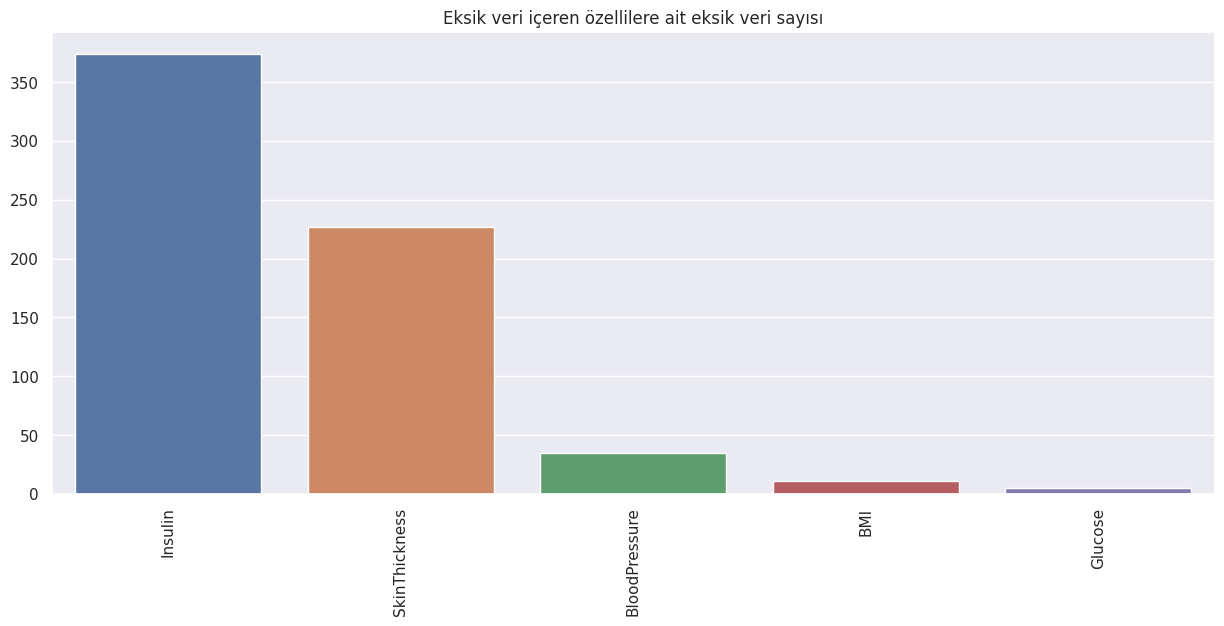

In [25]:
show_missing_values(df)

In [26]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [27]:
missing_values_table(df)

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


In [28]:
num_cols

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [29]:
# WE FILL THOSE THAT ARE NaN WITH THE MEDIAN WITH THE TARGET VARIABLE RELATIONSHIP
for col in num_cols:
    df[col]=df[col].fillna(df.groupby("Outcome")[col].transform("median"))

In [30]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
# UPPER AND LOWER THRESHOLDS AND OUTLIER OBSERVATION
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [32]:
 #DETERMINING UPPER AND LOWER THRESHOLD VALUES
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [33]:
#CHANGING THESE OUTLIER VALUES WITH LOWER AND UPPER LIMITS
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [34]:
check_outlier(df, num_cols)

True

In [35]:
for col in num_cols:
    replace_with_thresholds(df,col)

In [36]:
check_outlier(df, num_cols)

False

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


> **NEW FEATURES**

In [38]:
df["AGE_NEW"]= pd.cut(df["Age"],bins= [20,45,max(df["Age"])], labels=["mature","senior"])
df["GLUCOSE_NEW"]= pd.cut(df["Glucose"], bins=[0, 100, 140 , max(df["Glucose"])], labels=["low","normal","high"])
df["BMI_NEW"]=pd.cut(df["BMI"], bins=[18,25,32,max(df["BMI"])], labels=["Normal Weight","Overweight","Obese"])

In [39]:
df.loc[df["Insulin"]<=130,"INSULIN_NEW"]="normal"
df.loc[df["Insulin"]>130, "INSULIN_NEW"]="anormal"

In [40]:
df["GLUCOSE_INSULIN"]=df["Glucose"]*df["Insulin"]
df["INSULIN_BMI"]=df["Insulin"]*df["BMI"]
df["GLUCOSE_BLOODPRESSURE"]= df["Glucose"]* df["BloodPressure"]
df["INSULIN_BLOODPRESSURE"]= df["Insulin"]*df["BloodPressure"]

In [41]:
# AGE-GLUCOSE
df.loc[(df["AGE_NEW"]=="mature") & (df["GLUCOSE_NEW"]=="low"),"AGE_GLUCOSE"]="maturelow"
df.loc[(df["AGE_NEW"]=="mature") & (df["GLUCOSE_NEW"]=="normal"),"AGE_GLUCOSE"]="maturenormal"
df.loc[(df["AGE_NEW"]=="mature") & (df["GLUCOSE_NEW"]=="high"),"AGE_GLUCOSE"]="maturehigh"

df.loc[(df["AGE_NEW"]=="senior") & (df["GLUCOSE_NEW"]=="low"),"AGE_GLUCOSE"]="seniorlow"
df.loc[(df["AGE_NEW"]=="senior") & (df["GLUCOSE_NEW"]=="normal"),"AGE_GLUCOSE"]="seniornormal"
df.loc[(df["AGE_NEW"]=="senior") & (df["GLUCOSE_NEW"]=="high"),"AGE_GLUCOSE"]="seniorhigh"

In [42]:
# AGE-BMI
df.loc[(df["AGE_NEW"]=="mature") & (df["BMI_NEW"]=="Normal Weight"),"AGE_BMI"]="matureNormalWeight"
df.loc[(df["AGE_NEW"]=="mature") & (df["BMI_NEW"]=="Overweight"),"AGE_BMI"]="matureOverweight"
df.loc[(df["AGE_NEW"]=="mature") & (df["BMI_NEW"]=="Obese"),"AGE_BMI"]="matureObese"

df.loc[(df["AGE_NEW"]=="senior") & (df["BMI_NEW"]=="Normal Weight"),"AGE_BMI"]="seniorNormalWeight"
df.loc[(df["AGE_NEW"]=="senior") & (df["BMI_NEW"]=="Overweight"),"AGE_BMI"]="seniorOverweight"
df.loc[(df["AGE_NEW"]=="senior") & (df["BMI_NEW"]=="Obese"),"AGE_BMI"]="seniorObese"

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AGE_NEW,GLUCOSE_NEW,BMI_NEW,INSULIN_NEW,GLUCOSE_INSULIN,INSULIN_BMI,GLUCOSE_BLOODPRESSURE,INSULIN_BLOODPRESSURE,AGE_GLUCOSE,AGE_BMI
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1,senior,high,Obese,anormal,25086.000,5695.200,10656.000,12204.000,seniorhigh,seniorObese
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0,mature,low,Overweight,normal,8712.500,2726.500,5610.000,6765.000,maturelow,matureOverweight
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1,mature,high,Normal Weight,anormal,31018.500,3949.350,11712.000,10848.000,maturehigh,matureNormalWeight
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,mature,low,Overweight,normal,8366.000,2641.400,5874.000,6204.000,maturelow,matureOverweight
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,normal,Obese,anormal,23016.000,7240.800,5480.000,6720.000,maturenormal,matureObese


In [44]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols=[ col for col in cat_cols if col != "Outcome"]

Observations: 768
Variables: 19
cat_cols: 7
num_cols: 12
cat_but_car: 0
num_but_cat: 4


In [45]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'GLUCOSE_INSULIN',
 'INSULIN_BMI',
 'GLUCOSE_BLOODPRESSURE',
 'INSULIN_BLOODPRESSURE']

> **LABEL ENCODER**

In [46]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

> **ONE-HOT ENCODER**

In [47]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cat_cols = [col for col in cat_cols if col not in binary_cols]

df = one_hot_encoder(df, cat_cols,drop_first=True)

In [48]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AGE_NEW,INSULIN_NEW,GLUCOSE_INSULIN,INSULIN_BMI,GLUCOSE_BLOODPRESSURE,INSULIN_BLOODPRESSURE,AGE_GLUCOSE_maturelow,AGE_GLUCOSE_maturenormal,AGE_GLUCOSE_seniorhigh,AGE_GLUCOSE_seniorlow,AGE_GLUCOSE_seniornormal,AGE_BMI_matureObese,AGE_BMI_matureOverweight,AGE_BMI_seniorNormalWeight,AGE_BMI_seniorObese,AGE_BMI_seniorOverweight,GLUCOSE_NEW_normal,GLUCOSE_NEW_high,BMI_NEW_Overweight,BMI_NEW_Obese
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1,1,0,25086.000,5695.200,10656.000,12204.000,False,False,True,False,False,False,False,False,True,False,False,True,False,True
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0,0,1,8712.500,2726.500,5610.000,6765.000,True,False,False,False,False,False,True,False,False,False,False,False,True,False
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1,0,0,31018.500,3949.350,11712.000,10848.000,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,0,1,8366.000,2641.400,5874.000,6204.000,True,False,False,False,False,False,True,False,False,False,False,False,True,False
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,0,0,23016.000,7240.800,5480.000,6720.000,False,True,False,False,False,True,False,False,False,False,True,False,False,True


> **STANDARDIZATION**

In [49]:
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])
df[num_cols].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,GLUCOSE_INSULIN,INSULIN_BMI,GLUCOSE_BLOODPRESSURE,INSULIN_BLOODPRESSURE
0,0.600,0.765,0.000,1.000,1.000,0.170,0.665,1.235,0.850,0.647,0.531,0.626
1,-0.400,-0.790,-0.375,0.143,0.000,-0.599,-0.056,0.118,-0.410,-0.330,-0.653,-0.270
2,1.000,1.630,-0.500,0.571,1.000,-0.962,0.783,0.176,1.307,0.072,0.779,0.403
3,-0.400,-0.691,-0.375,-0.714,-0.127,-0.434,-0.537,-0.471,-0.437,-0.358,-0.591,-0.363
4,-0.600,0.494,-2.000,1.000,0.978,1.214,5.008,0.235,0.691,1.155,-0.683,-0.278


> **MODELS**

In [50]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [51]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_1 = rf_model.predict(X_test)
rf_accuracy= accuracy_score(y_pred_1, y_test)
rf_accuracy

0.8854166666666666

In [52]:
from lightgbm import LGBMClassifier

lgbm_model= LGBMClassifier(verbosity=-1)
lgbm_model.fit(X_train, y_train)
y_pred_2 =lgbm_model.predict(X_test)
lgbm_accuracy= accuracy_score(y_pred_2, y_test) 
lgbm_accuracy

0.8802083333333334

In [53]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_3 = log_model.predict(X_test)
logistic_sonuc = accuracy_score(y_pred_3, y_test)
logistic_sonuc

0.8489583333333334

In [54]:
from sklearn.tree import DecisionTreeClassifier
des_model = DecisionTreeClassifier(random_state=42)
des_model.fit(X_train, y_train)
y_pred_2 = des_model.predict(X_test)
decison_ = accuracy_score(y_pred_2, y_test)
decison_

0.8541666666666666

In [55]:
from xgboost import XGBClassifier

xgm_model= XGBClassifier()
xgm_model.fit(X_train, y_train)
y_pred =xgm_model.predict(X_test)
xgb= accuracy_score(y_pred, y_test)  
xgb

0.8854166666666666

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn_model= KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred =knn_model.predict(X_test)
knn= accuracy_score(y_pred, y_test) 
knn

0.8177083333333334

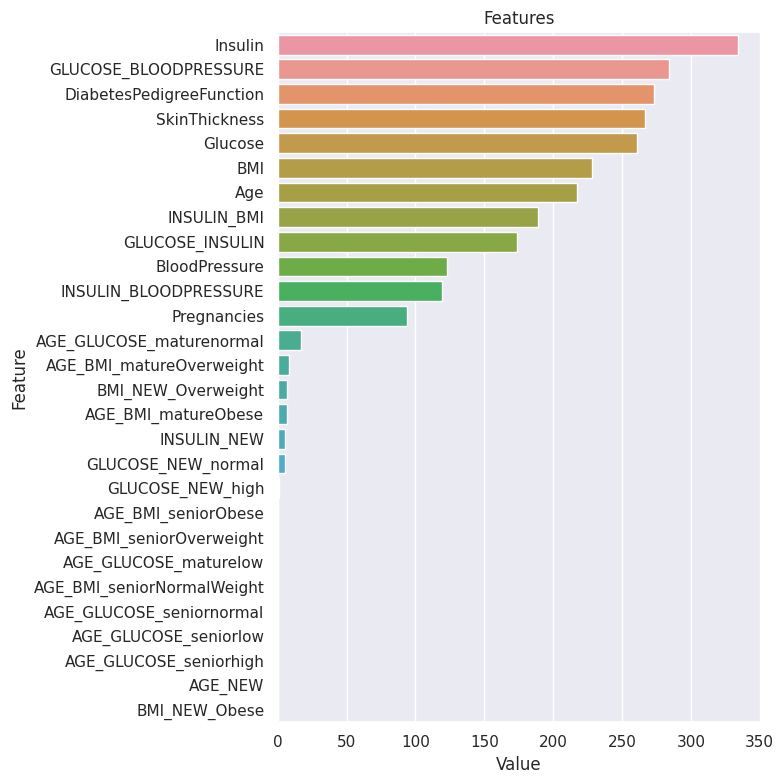

In [57]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(lgbm_model, X_train)